<a href="https://colab.research.google.com/github/rdonald03/cap-comp215/blob/main/Real_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions for ER graph / Critical value calculator 
In the second code cell below, there are two values that may be changed by the user. "n", which is the amount of nodes in each graph, which in rough terms, is the size of the graph, and "iterations", which is the amount of times a random graph will be generated for a specific value of p.

Increasing these values will result in different effects. While "n" increases, it will be seen that the critical p value will become vastly smaller. When the iterations value increases, the accuracy of the connection probability will be more precise.


Note that increasing either of these will results with longer run times

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
import statistics
import math

In [25]:
iterations = 100
n = 30

The critical p value for this graph is {0.11337324605540518}


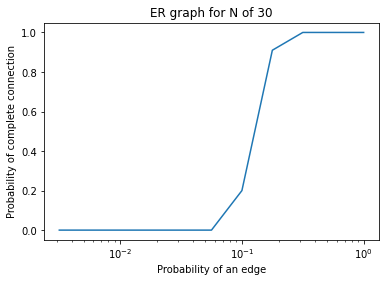

In [26]:
def random_create (p):
  x = random.random() < p
  return x


def all_pairs (x):
  return ((a, b) for i in range(1, len(x)) for a,b in zip(x, x[i:])) 
  

def random_pairs (x, p):
  return (i for i in all_pairs(x) if random_create(p)) 

def create_random_graph (n, p):
  Graph = nx.Graph ()
  Nodes = range(n)
  Graph.add_nodes_from(Nodes)
  Graph.add_edges_from(random_pairs(Nodes, p))
  return Graph

def reachable (G, start):
  seen = set()
  stack = [start]
  while stack:
    node = stack.pop()
    if node not in seen:
      seen.add(node)
      stack.extend(G.neighbors(node))
  return seen

def is_connected (G):
  start = next(iter(G))
  reach = reachable(G, start)
  return len(reach) == len(G)


def prop_connect (n, p, iterations):
  graphs = (create_random_graph(n, p)for i in range (iterations))
  return statistics.mean((1 if is_connected(G)else 0 for G in graphs))

def find_critical (n):
  x = {math.log(n) / n}
  return x


edge_prob = np.logspace(-2.5, 0, 11)
connect_prob =[prop_connect(n, p, iterations) for p in edge_prob]


plt.title ("ER graph for N of "+ str(n))
plt.xlabel ("Probability of an edge")
plt.ylabel ('Probability of complete connection')

plt.plot(edge_prob, connect_prob)

plt.xscale ("log")

print ("The critical p value for this graph is", (find_critical(n)))



# What python built in function is np.logspace most similar to?
The np.logspace function is not entirely similar to a singular built-in function, but the use of multiple built-in functions and opperands can yield the same results. The ** operand, as well as the range function used in a for loop, will allow us to have log spaced array's just as how to np.logspace function works. See example below

In [24]:
x = np.logspace (-2.5, 0, 11)
print ("This is the outcome of np.logspace",(x))


def examp ():
  starting = 10 ** -2.5
  finnished = 1
  h = 11
  x = []
  for i in range (h):
    y = starting * (finnished/starting) ** (i/(h-1))
    x.append (y)
  return x

print ("This is the outcome of pythons built-in functions",(examp ()))


This is the outcome of np.logspace [0.00316228 0.00562341 0.01       0.01778279 0.03162278 0.05623413
 0.1        0.17782794 0.31622777 0.56234133 1.        ]
This is the outcome of pythons built-in functions [0.0031622776601683794, 0.005623413251903491, 0.01, 0.017782794100389226, 0.0316227766016838, 0.05623413251903491, 0.09999999999999999, 0.1778279410038922, 0.316227766016838, 0.5623413251903491, 0.9999999999999999]


# Why do you think the textbook author chose to use logspace to define x axis values.
I believe the primary reason the textbook author used logspace to define the x axis values is because it easily allows us to test a wide range of values for p. Technically, we could just use a loop for p starting at a given number and incrementing upwards towards 1, but this would just be us picking arbitrary numbers, where as logspace gives us a well spaced range of p values that show both the large and small. I also believe the author chose to use logspace as it is much more simple than to create the function on ones own, as seen in the example above.


# In the experimental results, we find that “As n increases, the critical value (of p) gets smaller”.
This can be explained as since there are now more "nodes", the probability of an edge being formed is still the same, yet now since there are many more "oppurtunities" for an edge to be formed, it lowers the probability of an entire complete graph forming.
